# Spam Ham Detection Using NLP BOW

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# sklearn feature extraction

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Data preprocessing and Model Building

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Progess bars for loops and apply
from tqdm import  tqdm
tqdm.pandas() # Enable Progess_apply

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GORAKH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GORAKH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\GORAKH\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# Read Data 
df = pd.read_csv("email_data.csv")

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [4]:
df.shape

(5171, 4)

In [5]:
# EDA
df["label"].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [6]:
df["label"].value_counts(normalize=True)


label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

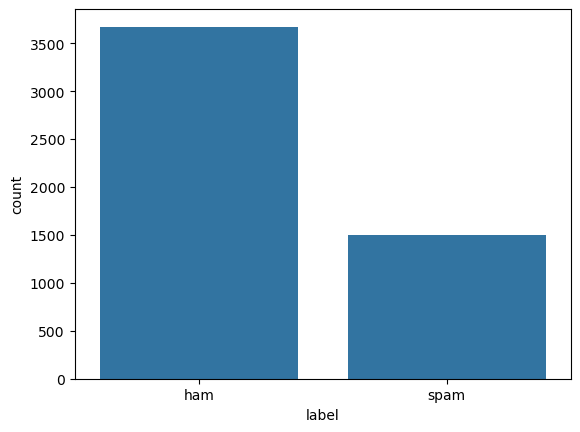

In [7]:
sns.countplot(x="label", data = df)

In [8]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [9]:
df = df.drop(columns="Unnamed: 0")

In [10]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [11]:
x = df[["text"]]
y = df["label"]

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [13]:
X_train.shape

(4136, 1)

In [14]:
Y_train.shape

(4136,)

In [15]:
X_test.shape

(1035, 1)

In [16]:
Y_test.shape

(1035,)

In [17]:
# Text Preprocessing
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [18]:
def preprocess(raw_text, flag):
    sentence = re.sub('[^a-zA-Z]', " ", raw_text)
    sentence = sentence.lower()
    tokens = sentence.split()
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([' '.join(clean_tokens), len(clean_tokens)])

In [19]:
# 'Progess Apply' insted apply progress_map
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'stem'))



100%|██████████████████████████████████████████████████████████████████████████████| 4136/4136 [06:13<00:00, 11.06it/s]


In [20]:
temp_df.head()

,0,1
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [21]:
temp_df.columns=['clean_text_stem','text_length_stem']
temp_df.head()

,clean_text_stem,text_length_stem
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [22]:
x_train=pd.concat([X_train,temp_df],axis=1)
x_train.head()

,text,clean_text_stem,text_length_stem
5132,Subject: april activity surveys\nwe are starti...,subject april activ survey start collect data ...,88
2067,Subject: message subject\nhey i ' am julie ^ _...,subject messag subject hey juli turn high scho...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105
2268,Subject: a new era of online medical care .\na...,subject new era onlin medic care new era onlin...,36


In [24]:
temp_df.columns=['clean_text_lemma','text_length_lemma']
temp_df.head()

,clean_text_lemma,text_length_lemma
5132,subject april activity survey starting collect...,88
2067,subject message subject hey julie turned high ...,44
4716,subject txu fuel sd nomination may attached ma...,34
4710,subject richardson volume nov dec meter nick s...,105
2268,subject new era online medical care new era on...,36


In [25]:
X_train=pd.concat([X_train,temp_df],axis=1)

In [26]:
X_train.head()

,text,clean_text_lemma,text_length_lemma
5132,Subject: april activity surveys\nwe are starti...,subject april activity survey starting collect...,88
2067,Subject: message subject\nhey i ' am julie ^ _...,subject message subject hey julie turned high ...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomination may attached ma...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volume nov dec meter nick s...,105
2268,Subject: a new era of online medical care .\na...,subject new era online medical care new era on...,36


# Converting Text to Numerical Vectors -BOW Representation

1.Learn the vocabulary from the trian data  
2. Transfrom the train['email'] to X_train(i.e.DTM)  
3. Transfrom the test['email'] to X_test(i.e.DTM)

In [27]:
vocab=CountVectorizer()
X_train_bow=vocab.fit_transform(X_train['clean_text_lemma'])

In [28]:
X_train_bow

<4136x38693 sparse matrix of type '<class 'numpy.int64'>'
	with 252668 stored elements in Compressed Sparse Row format>

In [29]:
print("Total unique Words:",len(vocab.vocabulary_))
print("Type Train Features:",type(X_train_bow))
print("Shape of input data:",X_train_bow.shape)

Total unique Words: 38693
Type Train Features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (4136, 38693)


In [30]:
print(X_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Preprocess the Test data

In [31]:
X_test['text']

1566    Subject: hpl nom for march 30 , 2001\n( see at...
1988    Subject: online pharxmacy 80 % off all meds\nd...
1235    Subject: re : nom / actual volume for april 17...
2868    Subject: re : meter 8740 dec 99\nrobert and i ...
4903    Subject: re : coastal oil & gas corporation\nm...
                              ...                        
1175    Subject: alert : spam prevention\ncllck the st...
4476    Subject: enron and blockbuster to launch enter...
4198    Subject: make your computer like new , remove ...
2689    Subject: temp forecast model . xls\nthis is th...
2142    Subject: enron / hpl actuals for august 31 , 2...
Name: text, Length: 1035, dtype: object

In [32]:
temp_df=X_test['text'].progress_apply(lambda x:preprocess(x,'lemma'))

100%|██████████████████████████████████████████████████████████████████████████████| 1035/1035 [01:18<00:00, 13.19it/s]


In [33]:
temp_df.head()

,0,1
1566,subject hpl nom march see attached file hplno ...,11
1988,subject online pharxmacy med disscount phafrma...,2590
1235,subject nom actual volume april th agree eilee...,44
2868,subject meter dec robert put head together dec...,332
4903,subject coastal oil gas corporation melissa de...,1241


In [34]:
temp_df.columns=['clean_text_lemma','text_length_lemma']
temp_df.head()

,clean_text_lemma,text_length_lemma
1566,subject hpl nom march see attached file hplno ...,11
1988,subject online pharxmacy med disscount phafrma...,2590
1235,subject nom actual volume april th agree eilee...,44
2868,subject meter dec robert put head together dec...,332
4903,subject coastal oil gas corporation melissa de...,1241


In [35]:
X_test=pd.concat([X_test,temp_df],axis=1)

In [36]:
X_test.head()

,text,clean_text_lemma,text_length_lemma
1566,"Subject: hpl nom for march 30 , 2001\n( see at...",subject hpl nom march see attached file hplno ...,11
1988,Subject: online pharxmacy 80 % off all meds\nd...,subject online pharxmacy med disscount phafrma...,2590
1235,Subject: re : nom / actual volume for april 17...,subject nom actual volume april th agree eilee...,44
2868,Subject: re : meter 8740 dec 99\nrobert and i ...,subject meter dec robert put head together dec...,332
4903,Subject: re : coastal oil & gas corporation\nm...,subject coastal oil gas corporation melissa de...,1241


In [37]:
X_test_bow=vocab.transform(X_test['clean_text_lemma'])

# Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_bow,Y_train)

LogisticRegression()

In [128]:
y_test_pred=classifier.predict(X_test_bow)

In [129]:
y_test_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [130]:
log_accuracy=(accuracy_score(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
log_accuracy

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       742
        spam       0.96      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



0.9835748792270531

# Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train_bow,Y_train)

DecisionTreeClassifier()

In [132]:
y_test_pred=classifier.predict(X_test_bow)

In [133]:
DT_accuracy=(accuracy_score(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
DT_accuracy

              precision    recall  f1-score   support

         ham       0.97      0.95      0.96       742
        spam       0.89      0.93      0.91       293

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.95      0.95      0.95      1035



0.9458937198067633

# Random forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_bow,Y_train)

RandomForestClassifier()

In [135]:
y_test_pred=classifier.predict(X_test_bow)

In [136]:
RF_accuracy=(accuracy_score(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
RF_accuracy

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       742
        spam       0.95      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



0.9806763285024155

# SVC

In [137]:
from sklearn.svm import SVC
SVclassifier=SVC()
SVclassifier.fit(X_train_bow,Y_train)

SVC()

In [138]:
y_test_pred=SVclassifier.predict(X_test_bow)

In [139]:
SVC_accuracy=(accuracy_score(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
SVC_accuracy

              precision    recall  f1-score   support

         ham       0.99      0.96      0.97       742
        spam       0.90      0.97      0.94       293

    accuracy                           0.96      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.96      0.96      1035



0.9632850241545894

# KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier=KNeighborsClassifier()
KNclassifier.fit(X_train_bow,Y_train)

KNeighborsClassifier()

In [141]:
y_test_pred=KNclassifier.predict(X_test_bow)

In [142]:
kn_accuracy=(accuracy_score(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
kn_accuracy

              precision    recall  f1-score   support

         ham       0.99      0.77      0.86       742
        spam       0.62      0.97      0.76       293

    accuracy                           0.83      1035
   macro avg       0.80      0.87      0.81      1035
weighted avg       0.88      0.83      0.83      1035



0.8260869565217391

# Bagging

In [143]:
from sklearn.ensemble import BaggingClassifier
BAclassifier=BaggingClassifier()
BAclassifier.fit(X_train_bow,Y_train)

BaggingClassifier()

In [144]:
y_test_pred=BAclassifier.predict(X_test_bow)

In [145]:
BA_accuracy=(accuracy_score(Y_test,y_test_pred))
print(classification_report(Y_test,y_test_pred))
BA_accuracy

              precision    recall  f1-score   support

         ham       0.98      0.97      0.97       742
        spam       0.92      0.95      0.93       293

    accuracy                           0.96      1035
   macro avg       0.95      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035



0.9603864734299516

In [146]:
evaluation = pd.DataFrame({'Algorithms':['Linear Regression','Decision Tree','Random Forest','SVC','KNN','Bagging'],"Accuracy":[log_accuracy,DT_accuracy,RF_accuracy,SVC_accuracy,kn_accuracy,BA_accuracy]})

In [147]:
evaluation

,Algorithms,Accuracy
0,Linear Regression,0.983575
1,Decision Tree,0.945894
2,Random Forest,0.980676
3,SVC,0.963285
4,KNN,0.826087
5,Bagging,0.960386
